<a href="https://colab.research.google.com/github/amrios80/linear-regression-tutorial/blob/master/aptos/aptos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

MINE-4101: Applied Data Science  
Univerisdad de los Andes  

**Contexto de Negocio:** La empresa Inmobiliaria Metro Cuadrado domicialada en la ciudad de Bogota - Colombia, quiere brindar a sus clientes una herramienta que les permita estimar el valor de un apartamento de acuerdo a sus caracteristicas fisicas y de ubicacion. El valor estimado debe ser lo mas cercano posible a la realidad para evitar labores de peritaje en el proceso de compra.

**Identificacion de la solución:** La necesidad de negocio planteada puede solucionarse utilizando un algoritmo de manchine learning como regresion lineal dado que se requiere predicir un valor numerico (precio de venta) y contamos con informacion de mercado que nos indica el valor real de los apartamentos de acuerdo a sus caracteristicas.

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)
pd.set_option('display.float_format', '{:.2f}'.format)

## **1. Carga de los datos**

In [3]:
dataset_url="https://github.com/amrios80/linear-regression-tutorial/raw/refs/heads/master/crabs/data/apartamentos.zip"
apto_df = pd.read_csv(dataset_url, compression="zip")

## **2. Entendimiento y limpieza de los datos**

Dado el contexto de negocio e interpretacion de los datos, se identifica que la variable PRECIO_VENTA es la variable objetivo del modelo de regresion lineal a desarrollar y se utilizaran todas las variables numericas, en cuanto a las variables categoricas consideraremos dentro del analisis SECTOR, ESTADO, ANTIGUEDAD previo conversion a valores numericos utilizando la tecnica de label encoding.

### **2.1 Entendimiento de los datos**

In [4]:
apto_df.shape

(43013, 46)

In [5]:
apto_df.dtypes

_id                         object
codigo                      object
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones               float64
banos                      float64
administracion             float64
parqueaderos               float64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso                       float64
closets                    float64
chimenea                   float64
permite_mascotas           float64
gimnasio                   float64
ascensor                   float64
conjunto_cerrado           float64
piscina                    float64
salon_comunal              float64
terraza                    float64
vigilancia                 float64
coords_modified               bool
localidad                   object
barrio                      object
estacion_tm_cercana         object
distancia_estacion_tm_m    float64
is_cerca_estacion_tm         int64
parque_cercano              object
distancia_parque_m         float64
is_cerca_parque              int64
dtype: object

In [6]:
apto_df.sample(3)

_id         codigo tipo_propiedad tipo_operacion  \
17632  66d86cfcceda690e8550cc40      MC4961717    APARTAMENTO       ARRIENDO   
20775  66d86d23ceda690e8550d887  3702-M4946592    APARTAMENTO          VENTA   
25913  66d86d6cceda690e8550ec99    10278-43198    APARTAMENTO          VENTA   

       precio_venta   area  habitaciones  banos  administracion  parqueaderos  \
17632           NaN  65.00          2.00   2.00             NaN          1.00   
20775  420000000.00  90.00          3.00   3.00       429000.00          2.00   
25913 1300000000.00 162.00          3.00   4.00             NaN          2.00   

                     sector  estrato          antiguedad  latitud  longitud  \
17632         SANTA BARBARA     5.00      MAS DE 20 ANOS     4.69    -74.05   
20775  COLINA Y ALREDEDORES     5.00      MAS DE 20 ANOS     4.73    -74.06   
25913                 CHICO     6.00  ENTRE 10 Y 20 ANOS     4.67    -74.05   

      direccion                                        descripcion  \
17632       NaN  excelente ubicacion a 10 minutos del centro co...   
20775       NaN  90 m2, tres alcobas principal con bano privado...   
25913       NaN  vendo apartamento  en el refugio de un area de...   

                 website                last_view                 datetime  \
17632  metrocuadrado.com  2024-08-09 09:56:08.917  2024-07-04 16:09:06.825   
20775  metrocuadrado.com  2024-07-07 13:34:56.340  2024-07-07 13:34:56.340   
25913  metrocuadrado.com  2024-07-10 21:08:58.440  2024-07-10 21:08:58.440   

       url timeline estado            compañia  precio_arriendo  jacuzzi  \
17632  NaN       []  USADO                 NaN       2490000.00     0.00   
20775  NaN      NaN  USADO  ALINA INMOBILIARIA              NaN     0.00   
25913  NaN      NaN  USADO      REMAX COLOMBIA              NaN     0.00   

       piso  closets  chimenea  permite_mascotas  gimnasio  ascensor  \
17632   NaN      NaN      0.00              0.00      0.00      0.00   
20775   NaN      NaN      0.00              0.00      0.00      1.00   
25913   NaN      NaN      0.00              0.00      1.00      1.00   

       conjunto_cerrado  piscina  salon_comunal  terraza  vigilancia  \
17632              0.00     0.00           0.00     0.00        0.00   
20775              1.00     0.00           0.00     0.00        1.00   
25913              0.00     0.00           0.00     0.00        1.00   

       coords_modified  localidad                          barrio  \
17632            False    USAQUEN                RINCON DEL CHICO   
20775            False       SUBA  SANTA HELENA BOSQUE DE CASIGUA   
25913            False  CHAPINERO                      EL REFUGIO   

      estacion_tm_cercana  distancia_estacion_tm_m  is_cerca_estacion_tm  \
17632           Calle 106                  1201.00                     0   
20775           Gratamira                  1328.32                     0   
25913              Héroes                  1697.73                     0   

                               parque_cercano  distancia_parque_m  \
17632         PARQUE METROPOLITANO EL COUNTRY             1854.29   
20775             PARQUE VECINAL PRADO PINZÓN              997.61   
25913  PARQUE VECINAL URBANIZACIÓN LA CABRERA              723.45   

       is_cerca_parque  
17632                0  
20775                0  
25913                0

##### **2.1.1 Tipos de Operacion y Tipo de Propiedad**: Identificamos en el dataset operaciones diferentes a VENTA, exploramos las operaciones existentes y eliminamos la operacion ARRIENDO ya que no corresponde al objetivo del estudio, en cuanto al tipo de propiedad, se consideran los apartamentos y se excluyen las casas.

In [7]:
apto_df["tipo_operacion"].value_counts()

tipo_operacion
VENTA               27270
ARRIENDO            15515
VENTA Y ARRIENDO      228
Name: count, dtype: int64

In [8]:
apto_df=apto_df[(apto_df["tipo_operacion"] == "VENTA") | (apto_df["tipo_operacion"]=="VENTA Y ARRIENDO")]

In [9]:
apto_df["tipo_operacion"].value_counts()

tipo_operacion
VENTA               27270
VENTA Y ARRIENDO      228
Name: count, dtype: int64

In [10]:
apto_df["tipo_propiedad"].value_counts()

tipo_propiedad
APARTAMENTO                  27428
CASA CON CONJUNTO CERRADO       60
CASA                            10
Name: count, dtype: int64

In [11]:
apto_df=apto_df[(apto_df["tipo_propiedad"] == "APARTAMENTO")]

In [12]:
apto_df["tipo_propiedad"].value_counts()

tipo_propiedad
APARTAMENTO    27428
Name: count, dtype: int64

##### **2.1.2 Medidas de tendencia central y dispercion de la variable PRECIO_VENTA**: Identificamos que la variable precio tiene una alta dispersion ya que la desviacion estandar esta por encima de la media, los precios de venta en el dataset varian entre 1'000.000 y 4.250.000'000.000, es posible que el precio minimo corresponda a una inconsistencia en los datos ya que el valor es consecuente con un canon de arrendamiento mas no con el precio de venta de un apartamento, el precio maximo es muy alto con respecto al valor maximo del 75% de la oferta de apartamentos que es de 1.340'000.000

In [13]:
apto_df["precio_venta"].describe()

count           27428.00
mean       2375589728.70
std       55900056661.84
min           1000000.00
25%         410000000.00
50%         710000000.00
75%        1350000000.00
max     4250000000000.00
Name: precio_venta, dtype: float64

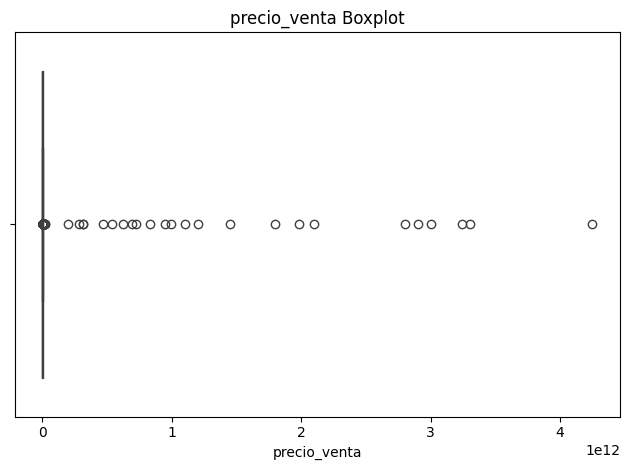

In [14]:
def boxplot(apto_df , field="precio_venta"):
  plt.xlabel(field)
  sns.boxplot(x=apto_df[field])
  plt.title(f'{field} Boxplot')
  plt.xlabel(field)
  plt.tight_layout()
  plt.show()

boxplot(apto_df, field="precio_venta")

##### **2.1.3 Eliminar valores atipicos de la variable PRECIO_VENTA**: Removiendo los valores atipicos los valores minimos y maximos fluctuan entre  171'500.000 COP y 1.570'000.000 COP, la desviacion estandar es menor que el promedio y el valor promedio de los apartamentos es de 676.955.510 COP consideramos que esta información esta mas acorde con la realidad del mercado.

In [15]:
def cut_outliers_from_df(df0 , field="precio_venta", iqr_pct=0.25):
  df=df0.copy()
  if pd.api.types.is_numeric_dtype(df[field]):
     q1 = df[field].quantile(0.25)
     q3 = df[field].quantile(0.75)
     iqr = q3 - q1
     lower_bound = q1 - (iqr_pct * iqr)
     upper_bound = q3 + (iqr_pct * iqr)
     df=df[(df[field] >= lower_bound) & (df[field] <= upper_bound)]
  return df

In [16]:
df=cut_outliers_from_df(apto_df, field="precio_venta")
apto_df=df
apto_df["precio_venta"].describe()


count        21070.00
mean     681246143.43
std      365767799.31
min      175000000.00
25%      389462500.00
50%      596300000.00
75%      904400000.00
max     1585000000.00
Name: precio_venta, dtype: float64

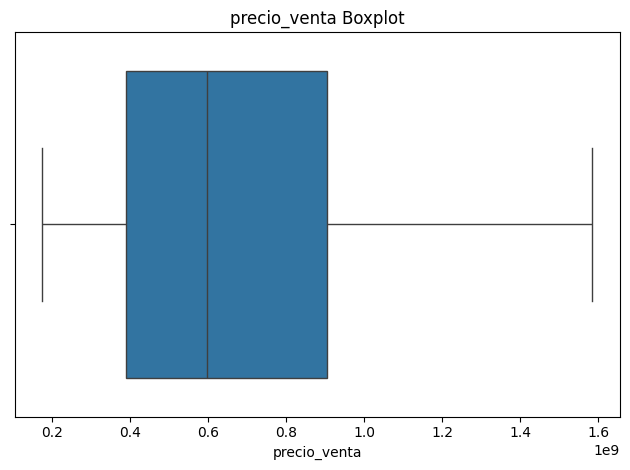

In [17]:
def boxplot(apto_df , field="precio_venta"):
  plt.xlabel(field)
  sns.boxplot(x=apto_df[field])
  plt.title(f'{field} Boxplot')
  plt.xlabel(field)
  plt.tight_layout()
  plt.show()

boxplot(apto_df, field="precio_venta")

##### **2.1.4 Exploracion variables categoricas ANTIGUEDAD, ESTADO y SECTOR**: Del total de la oferta de apartamentos en venta analizados (20.634), cerca del 65% tienen una antiguedad mayor a 10 años (13.277). El 1% de los apartamentos son NUEVOS. El 80% de la oferta de apartamentos se concentra en los siguientes sectores: SANTA BARBARA, CHICO, COLINA Y ALREDEDORES, COUNTRY, CEDRITOS, NIZA ALHAMBRA, CHAPINERO ALTO, ORQUIDEAS, SALITRE MODELIA, ALTOS DE SUBA Y CERROS DE SAN JORGE.

In [18]:
apto_df["antiguedad"].value_counts()

antiguedad
MAS DE 20 ANOS        7677
ENTRE 10 Y 20 ANOS    5558
ENTRE 0 Y 5 ANOS      3585
ENTRE 5 Y 10 ANOS     3335
REMODELADO             690
SOBRE PLANOS           106
EN CONSTRUCCION         96
PARA ESTRENAR           16
Name: count, dtype: int64

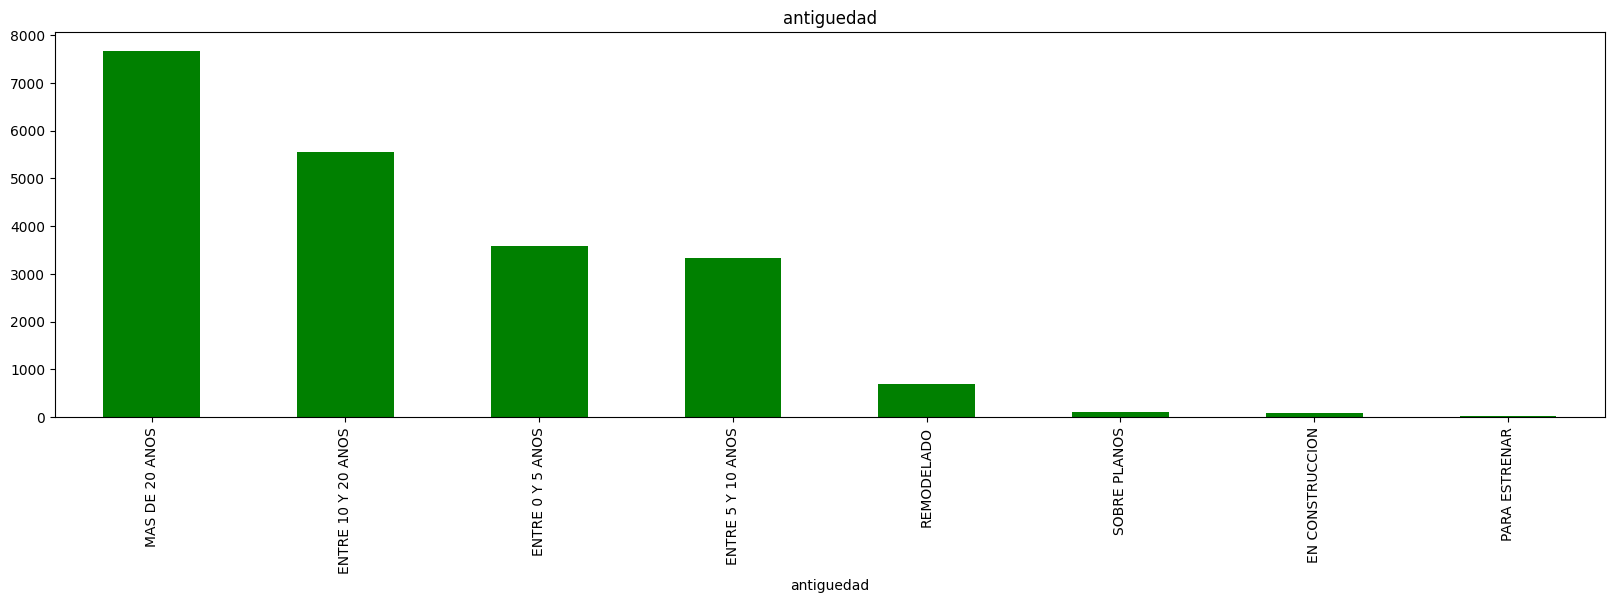

In [19]:
fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
apto_df["antiguedad"].value_counts().plot(kind="bar", ax=ax1, color="green")
ax1.set_title("antiguedad")
plt.show()

In [20]:
apto_df["estado"].value_counts()

estado
USADO    20422
NUEVO      218
Name: count, dtype: int64

In [21]:
sector_frec_cumsum = apto_df["sector"].value_counts(normalize=True).cumsum()
most_representative_sector = sector_frec_cumsum.loc[sector_frec_cumsum < 0.8].index.tolist()
most_representative_sector

['SANTA BARBARA',
 'CHICO',
 'COLINA Y ALREDEDORES',
 'COUNTRY',
 'CEDRITOS',
 'NIZA ALHAMBRA',
 'CHAPINERO ALTO',
 'ORQUIDEAS',
 'SALITRE MODELIA',
 'ALTOS DE SUBA Y CERROS DE SAN JORGE']

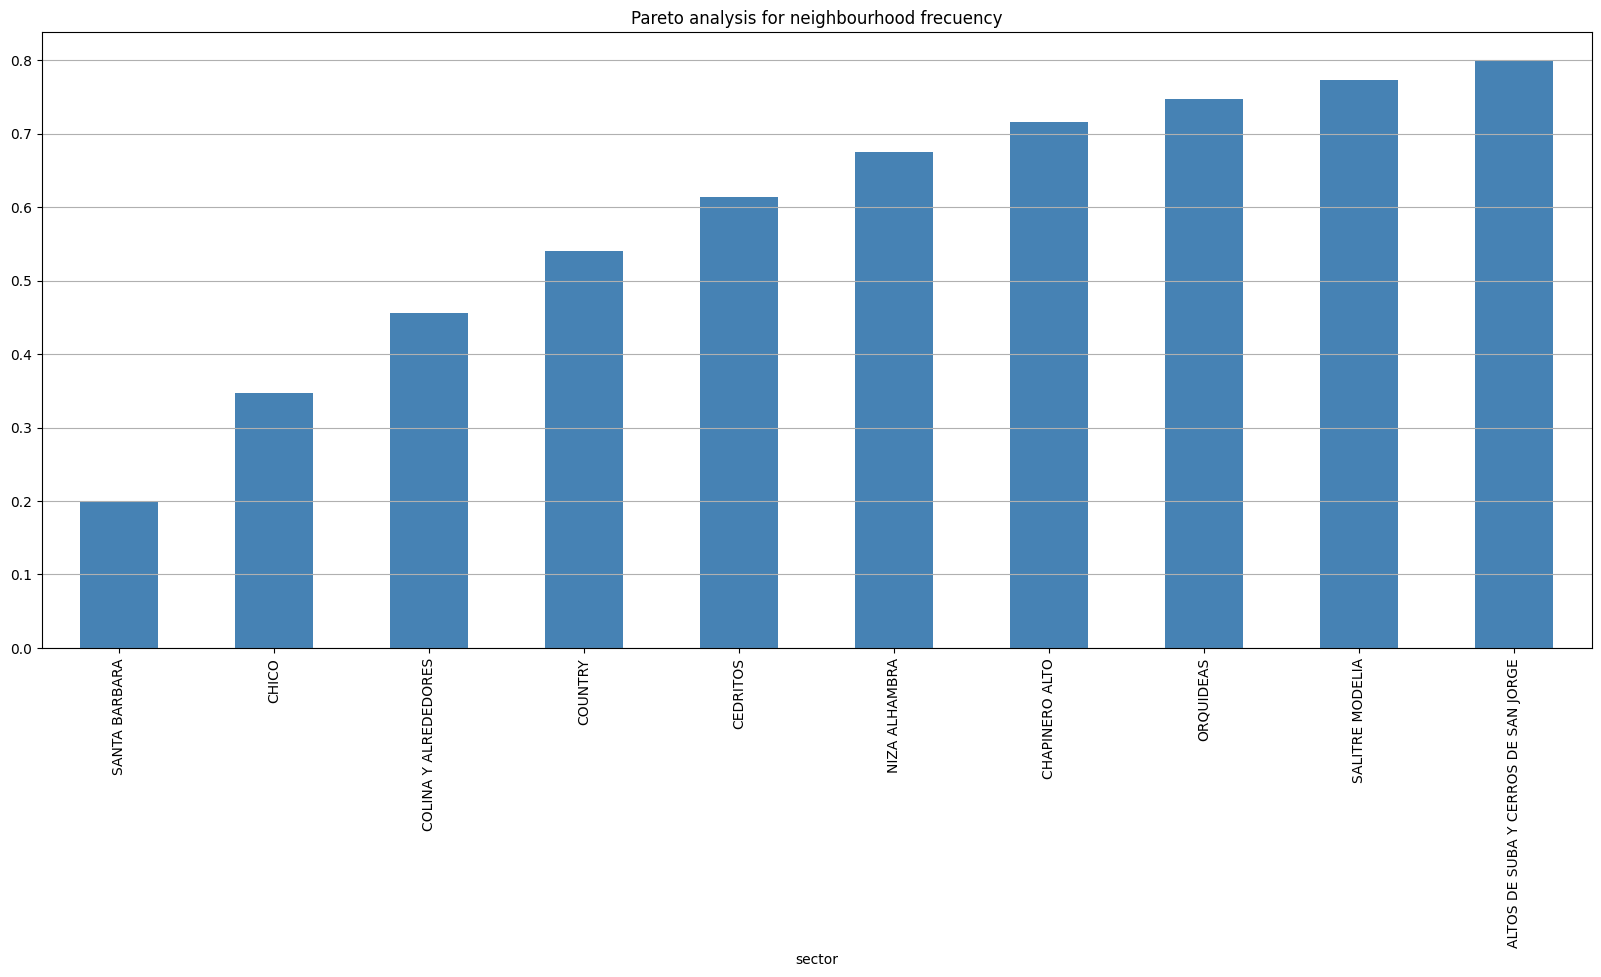

In [22]:
plt.figure(figsize=(20, 8))
sector_frec_cumsum.loc[sector_frec_cumsum < 0.8].plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

##### **2.1.5 Crear dataset de entrada al modelo:** Se identifican las variables categoricas, numericas (features) y variable objetivo (target) para generar el dataset que se utilizara en el analisis. No se tienen en cuenta las variables de entrada que tienen similitud y/o que son representan el detalle de otra.

In [23]:
numeric_vars = ["area", "habitaciones", "banos", "administracion", "parqueaderos", "estrato", "jacuzzi","piso","closets", "chimenea", "permite_mascotas","gimnasio", "ascensor","piscina","salon_comunal","terraza","vigilancia","distancia_estacion_tm_m","distancia_parque_m", "is_cerca_parque","conjunto_cerrado"]
category_vars = ["tipo_propiedad", "sector", "antiguedad", "estado", "localidad","compañia","barrio","estacion_tm_cercana","parque_cercano"]
target_var="precio_venta"
features=numeric_vars + category_vars

In [24]:
# Se define funcion para transformar las variables categoricas a numericas
def get_df(df, target_var="target", numeric_vars=[], category_vars=[]):
  df = df.copy()
  label_encoder = LabelEncoder()
  for col in category_vars:
      df[col] = label_encoder.fit_transform(df[col].astype(str))
  df=df[ numeric_vars + category_vars+ [target_var]]
  return df

In [25]:
# Se crea el dataset df con las variables de entrada mas la variable objetivo
df = get_df(apto_df,"precio_venta" ,numeric_vars, category_vars)

In [26]:
df.sample(3)

area  habitaciones  banos  administracion  parqueaderos  estrato  \
19439  96.00          3.00   2.00       513000.00          2.00     5.00   
2891   60.00          1.00   1.00       326000.00          1.00     6.00   
30197 106.00          3.00   3.00       580000.00          2.00     5.00   

       jacuzzi  piso  closets  chimenea  permite_mascotas  gimnasio  ascensor  \
19439     0.00   NaN      NaN      0.00              0.00      1.00      1.00   
2891      0.00   NaN      NaN      0.00              0.00      0.00      1.00   
30197     0.00   NaN      NaN      0.00              0.00      1.00      1.00   

       piscina  salon_comunal  terraza  vigilancia  distancia_estacion_tm_m  \
19439     0.00           0.00     0.00        1.00                   406.84   
2891      0.00           0.00     0.00        0.00                  1397.67   
30197     0.00           0.00     0.00        1.00                  2600.27   

       distancia_parque_m  is_cerca_parque  conjunto_cerrado  tipo_propiedad  \
19439              280.90                1              1.00               0   
2891               428.42                1              0.00               0   
30197              953.49                0              1.00               0   

       sector  antiguedad  estado  localidad  compañia  barrio  \
19439      62           4       1         15        51     584   
2891       25           4       1          4       515     766   
30197      79           1       1         17       375     926   

       estacion_tm_cercana  parque_cercano  precio_venta  
19439                   80               1  540000000.00  
2891                    38             139  468000000.00  
30197                   24              15  920000000.00

##### **2.1.6 Eliminacion de columnas sin informacion, valores nulos del dataset y valores en 0 de la variable objetivo:**  Se identifican las columnas con valores nulos para hacer limpieza del dataset. Las variables de entrada piso y closets no traen informacion, no es posible realizar imputacion de datos por lo que se decide quitar estas columnas

In [27]:
# Encuentra el porcentaje de nulos por columna
df[[target_var]+features].isnull().sum() / df.shape[0]

precio_venta              0.00
area                      0.00
habitaciones              0.00
banos                     0.00
administracion            0.09
parqueaderos              0.00
estrato                   0.00
jacuzzi                   0.00
piso                      1.00
closets                   1.00
chimenea                  0.00
permite_mascotas          0.00
gimnasio                  0.00
ascensor                  0.00
piscina                   0.00
salon_comunal             0.00
terraza                   0.00
vigilancia                0.00
distancia_estacion_tm_m   0.00
distancia_parque_m        0.00
is_cerca_parque           0.00
conjunto_cerrado          0.00
tipo_propiedad            0.00
sector                    0.00
antiguedad                0.00
estado                    0.00
localidad                 0.00
compañia                  0.00
barrio                    0.00
estacion_tm_cercana       0.00
parque_cercano            0.00
dtype: float64

In [28]:
df.sample(3)

area  habitaciones  banos  administracion  parqueaderos  estrato  \
42417  55.00          1.00   2.00       480000.00          1.00     4.00   
8633  121.00          2.00   4.00       495000.00          2.00     4.00   
26615  39.00          1.00   2.00       200000.00          1.00     6.00   

       jacuzzi  piso  closets  chimenea  permite_mascotas  gimnasio  ascensor  \
42417     0.00   NaN      NaN      0.00              0.00      0.00      1.00   
8633      0.00   NaN      NaN      0.00              0.00      0.00      0.00   
26615     0.00   NaN      NaN      0.00              0.00      0.00      1.00   

       piscina  salon_comunal  terraza  vigilancia  distancia_estacion_tm_m  \
42417     0.00           0.00     0.00        0.00                   279.46   
8633      0.00           0.00     0.00        1.00                   267.48   
26615     0.00           0.00     0.00        1.00                   952.08   

       distancia_parque_m  is_cerca_parque  conjunto_cerrado  tipo_propiedad  \
42417              316.62                1              0.00               0   
8633               635.31                0              0.00               0   
26615              882.25                0              1.00               0   

       sector  antiguedad  estado  localidad  compañia  barrio  \
42417      62           1       1         15       807     115   
8633       18           4       1         17       631     527   
26615      79           3       1         17       216     925   

       estacion_tm_cercana  parque_cercano  precio_venta  
42417                   80              35  395000000.00  
8633                    25              55  630000000.00  
26615                   24              15  370000000.00

In [29]:
#Elimina las variables de entrada piso y closets
if "piso" in df.columns:
    df = df.drop(columns=['piso'])
    if "piso" in features:
        features.remove("piso")
if "closets" in df.columns:
    df = df.drop(columns=['closets'])
    if "closets" in features:
        features.remove("closets")

In [30]:
#Validamos que no existan las columnas eliminadas anteriormente
print(df.columns)

Index(['area', 'habitaciones', 'banos', 'administracion', 'parqueaderos',
       'estrato', 'jacuzzi', 'chimenea', 'permite_mascotas', 'gimnasio',
       'ascensor', 'piscina', 'salon_comunal', 'terraza', 'vigilancia',
       'distancia_estacion_tm_m', 'distancia_parque_m', 'is_cerca_parque',
       'conjunto_cerrado', 'tipo_propiedad', 'sector', 'antiguedad', 'estado',
       'localidad', 'compañia', 'barrio', 'estacion_tm_cercana',
       'parque_cercano', 'precio_venta'],
      dtype='object')


In [31]:
# Quita los valores nulos
df = df.dropna(subset=[target_var]+features)
df_clean = df.dropna()
df= df_clean
df.shape

(19235, 29)

In [32]:
# Quita los precios en cero.
df=df[df[target_var]>0]
df.shape

(19235, 29)

### **2.2. Búsqueda de relaciones con la variable objetivo**

Si se logra visualizar o cuantificar altas correlaciones entre las variables de entrada y la variable objetivo, se podrán soportar las decisiones del experto con base en la evidencia.

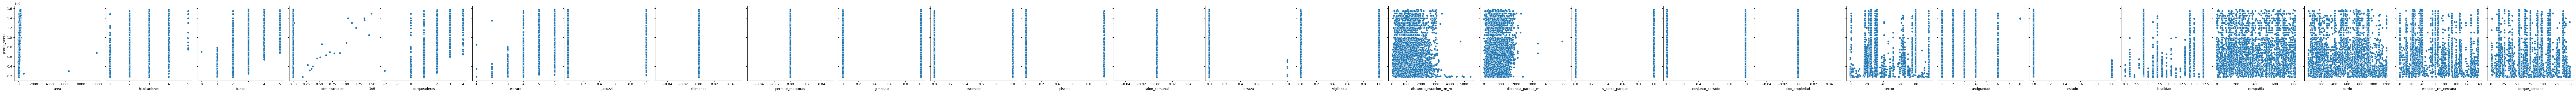

In [33]:
sns.pairplot(df.sample(frac=0.2), height=4, y_vars=target_var, x_vars=features, kind="scatter")


#####**2.2.1 Eliminacion de variables de entrada con valor 0:** Se eliminan las variables de entrada: salón comunal, permite mascotas, chimenea ya que todos sus valores estan el 0.

In [34]:
if "permite_mascotas" in df.columns:
    df = df.drop(columns=['permite_mascotas'])
    if "permite_mascotas" in features:
        features.remove("permite_mascotas")
if "chimenea" in df.columns:
    df = df.drop(columns=['chimenea'])
    if "chimenea" in features:
        features.remove("chimenea")
if "salon_comunal" in df.columns:
    df = df.drop(columns=['salon_comunal'])
    if "salon_comunal" in features:
        features.remove("salon_comunal")
if "tipo_propiedad" in df.columns:
    df = df.drop(columns=['tipo_propiedad'])
    if "tipo_propiedad" in features:
        features.remove("tipo_propiedad")


#####**2.2.2 Observacion variables de entrada Area y Administracion:** Se observan valores atípicos para las variables Area y Administracion y no permiten validar la correlacion entre estas variables y el precio de venta.

In [35]:
def cut_outliers_from_df(df0 , field="price", iqr_pct=0.6):
  df=df0.copy()
  print(f"Statistics for {field}:")
  print("before:")
  print(df[field].describe( percentiles=[0.25, 0.50, 0.75, 0.95]))
  if pd.api.types.is_numeric_dtype(df[field]):
     q1 = df[field].quantile(0.25)
     q3 = df[field].quantile(0.75)
     iqr = q3 - q1
     lower_bound = q1 - (iqr_pct * iqr)
     upper_bound = q3 + (iqr_pct * iqr)
     df=df[(df[field] >= lower_bound) & (df[field] <= upper_bound)]
     print(f"after (iqr):")
     print(df[field].describe( percentiles=[0.25, 0.50, 0.75, 0.95]))
  return df

In [36]:
#Aplica la funcion cut_outliers_from_df para quitar outliers LO APLICA A TODAS LAS VARIABLES DE ENTRADA QUE SON DE INTERES
df2=cut_outliers_from_df(df, field="area")

Statistics for area:
before:
count   19235.00
mean      113.42
std       248.97
min         0.00
25%        67.24
50%        95.80
75%       140.00
95%       208.00
max     19621.00
Name: area, dtype: float64
after (iqr):
count   17354.00
mean       96.68
std        38.85
min        23.62
25%        65.00
50%        90.00
75%       125.20
95%       169.00
max       183.59
Name: area, dtype: float64


In [37]:
df2=cut_outliers_from_df(df2, field="administracion")
df=df2

Statistics for administracion:
before:
count        17354.00
mean       3129888.15
std       44906184.42
min              1.00
25%         310000.00
50%         500000.00
75%         795000.00
95%        1284070.00
max     1600000000.00
Name: administracion, dtype: float64
after (iqr):
count     15474.00
mean     501196.88
std      256756.54
min       20000.00
25%      300000.00
50%      465000.00
75%      692825.00
95%      980000.00
max     1086000.00
Name: administracion, dtype: float64


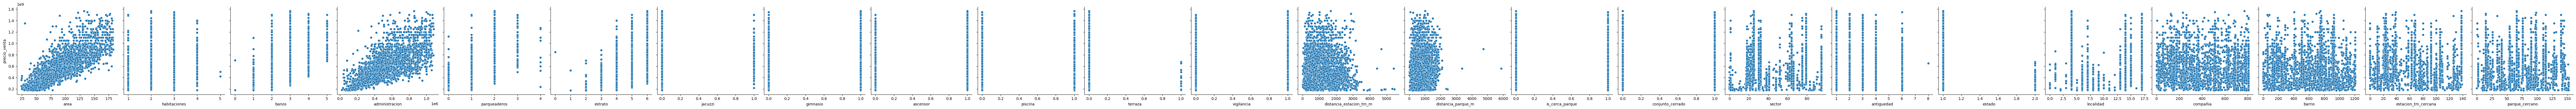

In [38]:
sns.pairplot(df.sample(frac=0.2), height=4, y_vars=target_var, x_vars=features, kind="scatter")

### **2.3 Búsqueda de relaciones entre las variables de entrada**

<Axes: >

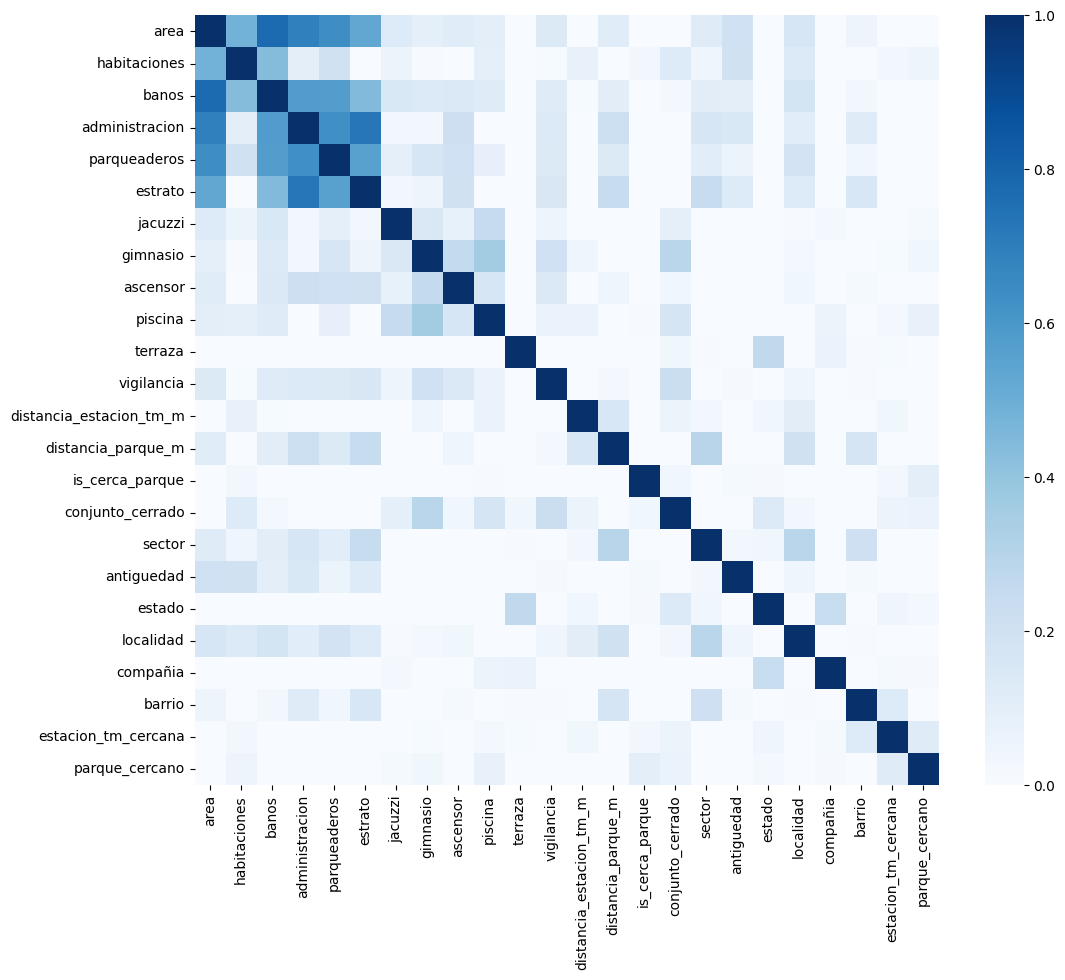

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[features].corr(), cmap="Blues", vmin=0, vmax=1)

Se observa una correlacion fuerte entre las variables de entrada, banos y parqueaderos asi como tambien estrato con baños y parquederos. Por lo anterior se eliminaran la variables banos y parqueaderos.

In [40]:
if "banos" in df.columns:
    df = df.drop(columns=['banos'])
    if "banos" in features:
        features.remove("banos")
if "parqueaderos" in df.columns:
    df = df.drop(columns=['parqueaderos'])
    if "parqueaderos" in features:
        features.remove("parqueaderos")
if "estrato" in df.columns:
    df = df.drop(columns=['estrato'])
    if "estrato" in features:
        features.remove("estrato")

<Axes: >

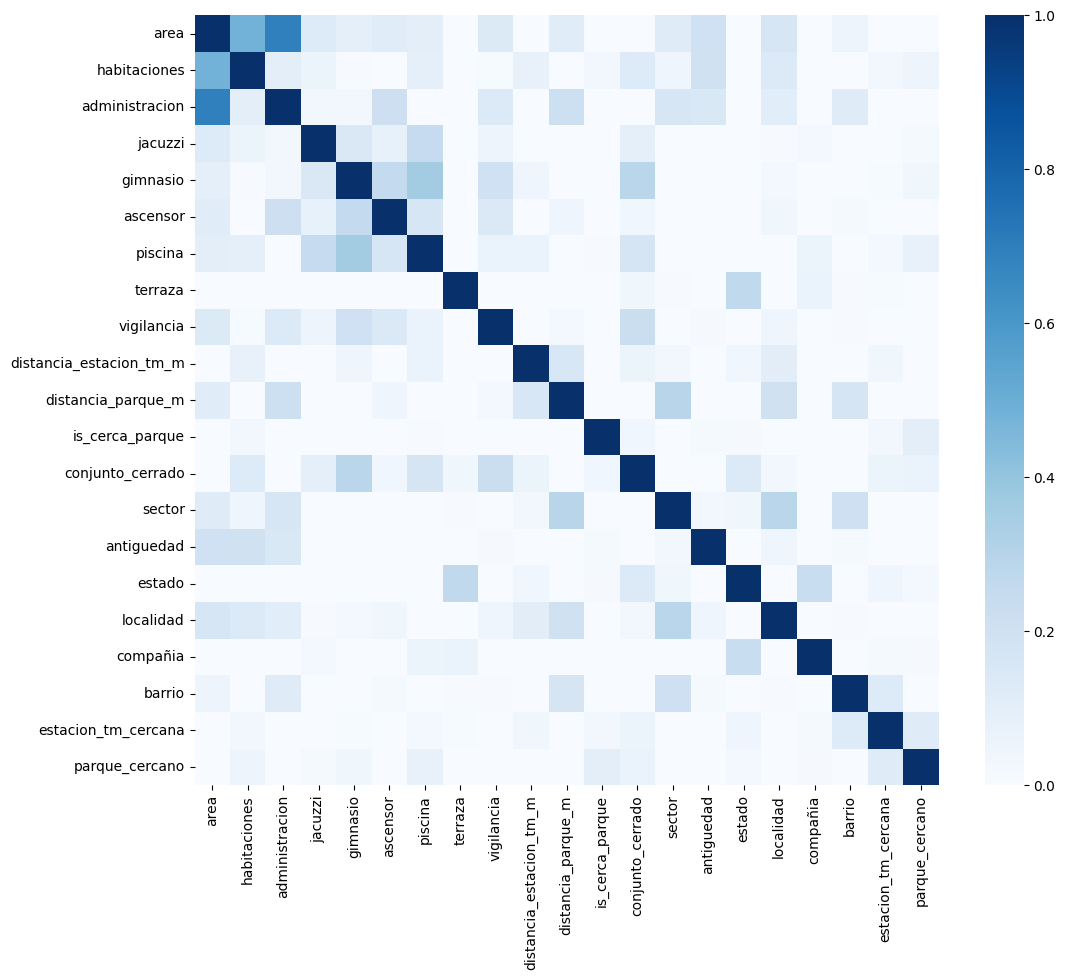

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[features].corr(), cmap="Blues", vmin=0, vmax=1)

## **3. Preparacion de datos**


In [42]:
total_rows = df.shape[0]
total_rows

15474

In [43]:
df.loc[df.duplicated(subset=features, keep=False)].head(3)

area  habitaciones  administracion  jacuzzi  gimnasio  ascensor  \
346  45.00          3.00       124209.00     0.00      0.00      0.00   
605 121.73          3.00       900000.00     0.00      0.00      1.00   
608  59.00          2.00       400000.00     0.00      1.00      1.00   

     piscina  terraza  vigilancia  distancia_estacion_tm_m  \
346     0.00     0.00        0.00                   942.74   
605     0.00     0.00        1.00                  1547.06   
608     0.00     0.00        1.00                   894.60   

     distancia_parque_m  is_cerca_parque  conjunto_cerrado  sector  \
346              659.25                0              1.00      83   
605              569.72                0              1.00      25   
608              934.24                0              1.00      30   

     antiguedad  estado  localidad  compañia  barrio  estacion_tm_cercana  \
346           3       2         14       807     845                  101   
605           6       1          4       625      91                   68   
608           1       1         14       625     664                   86   

     parque_cercano  precio_venta  
346              83  195000000.00  
605             139  750000000.00  
608             128  355000000.00

In [44]:
duplicated_rows = df.loc[df.duplicated(subset=features, keep=False)].shape[0]
duplicated_rows

665

In [45]:
print(f"Duplicates: {(duplicated_rows/total_rows)*100:.4f}%")

Duplicates: 4.2975%


In [46]:
df.loc[df.duplicated(subset=features+["precio_venta"], keep=False)].tail(4)

area  habitaciones  administracion  jacuzzi  gimnasio  ascensor  \
42792 82.00          2.00       493000.00     0.00      0.00      1.00   
42841 68.00          2.00       600000.00     0.00      0.00      0.00   
42842 68.00          2.00       600000.00     0.00      0.00      0.00   
42894 90.00          3.00       630000.00     0.00      0.00      0.00   

       piscina  terraza  vigilancia  distancia_estacion_tm_m  \
42792     0.00     0.00        0.00                  1379.67   
42841     0.00     0.00        0.00                   372.65   
42842     0.00     0.00        0.00                   372.65   
42894     0.00     0.00        1.00                  1004.44   

       distancia_parque_m  is_cerca_parque  conjunto_cerrado  sector  \
42792             1545.63                0              0.00      79   
42841              615.56                0              0.00      64   
42842              615.56                0              0.00      64   
42894             1010.14                0              1.00      32   

       antiguedad  estado  localidad  compañia  barrio  estacion_tm_cercana  \
42792           4       1         17       621     711                   22   
42841           2       1         14       621     682                  128   
42842           2       1         14       621     682                  128   
42894           4       1         17       776     248                   11   

       parque_cercano  precio_venta  
42792              98  480000000.00  
42841             131  480000000.00  
42842             131  480000000.00  
42894              54  450000000.00

In [47]:
duplicated_rows = df.loc[df.duplicated(subset=features+["precio_venta"], keep=False)].shape[0]
duplicated_rows

545

In [48]:
print(f"Duplicates: {(duplicated_rows/total_rows)*100:.4f}%")

Duplicates: 3.5220%


Existe un ~5.2% de registros con variables de entrada duplicadas, incluso con variable objetivo diferente. Al incluir la variable objetivo dentro del análisis de duplicados, se obtiene el ~4% registros duplicados adicionales. Para un porcentaje total de ~9.2%, se decide eliminar los datos duplicados con el fin de no afectar en la funcion de estimacion.

In [49]:
df.drop_duplicates(subset=features, inplace=True)
df.drop_duplicates(subset=features+["precio_venta"], inplace=True)

In [50]:
df.shape

(15075, 22)

## **4. Particionamiento del conjunto de datos en entrenamiento y prueba**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df["precio_venta"], test_size=0.3, random_state=1)

In [52]:
X_train.shape, y_train.shape

((10552, 21), (10552,))

In [53]:
X_test.shape, y_test.shape

((4523, 21), (4523,))

## **5. Entrenamiento de un primer modelo de regresión lineal**

In [54]:
regression = LinearRegression()

In [55]:
regression.fit(X_train, y_train)

LinearRegression()

## **4.1. Interpretación de los coeficientes y del intercepto**


In [56]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

columns         coef
0                      area   5519506.81
1              habitaciones -48017528.19
2            administracion       328.24
3                   jacuzzi   7063162.08
4                  gimnasio  53243596.33
5                  ascensor   8281657.56
6                   piscina  31190501.69
7                   terraza  15563130.55
8                vigilancia   6264905.96
9   distancia_estacion_tm_m     -9910.33
10       distancia_parque_m      8452.93
11          is_cerca_parque  12994444.21
12         conjunto_cerrado -10394345.92
13                   sector    429086.13
14               antiguedad -32693231.57
15                   estado -18836554.13
16                localidad  -6248488.21
17                 compañia    -11882.99
18                   barrio     -9819.22
19      estacion_tm_cercana    -16961.22
20           parque_cercano    -90210.12

In [57]:
regression.intercept_

199186068.76107872

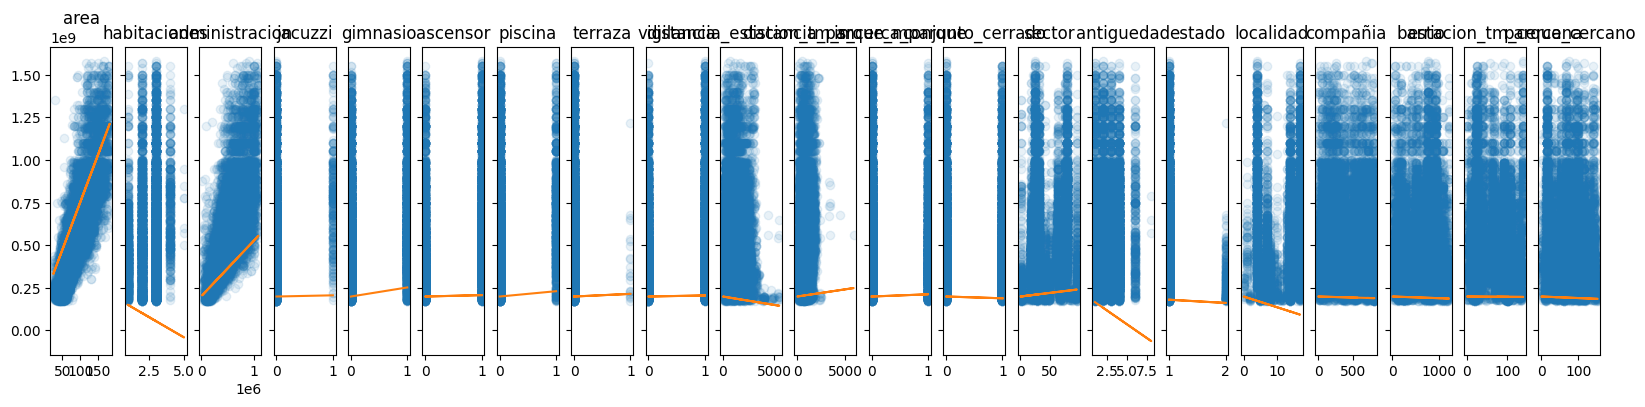

In [58]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

## **4.2. Validación (evaluación) del modelo**

**Mean Absolute Error (MAE)**

In [59]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))



Train: 91480885.62919794
Test: 93419197.66431883


**Root Mean Squeared Error (RMSE)**

In [60]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 126926723.82794265
Test: 127589965.74480325


**Análisis del error**

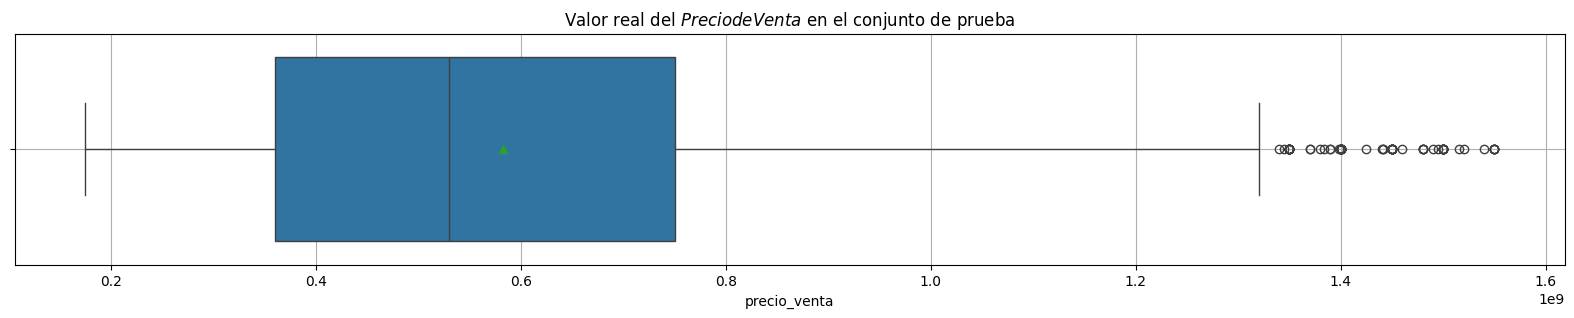

In [61]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real del $\t{Precio de Venta}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [62]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count         4523.00
mean     582498772.55
std      288572521.72
min      175000000.00
25%      360000000.00
50%      530000000.00
75%      750000000.00
99%     1400000000.00
max     1550000000.00
Name: precio_venta, dtype: float64

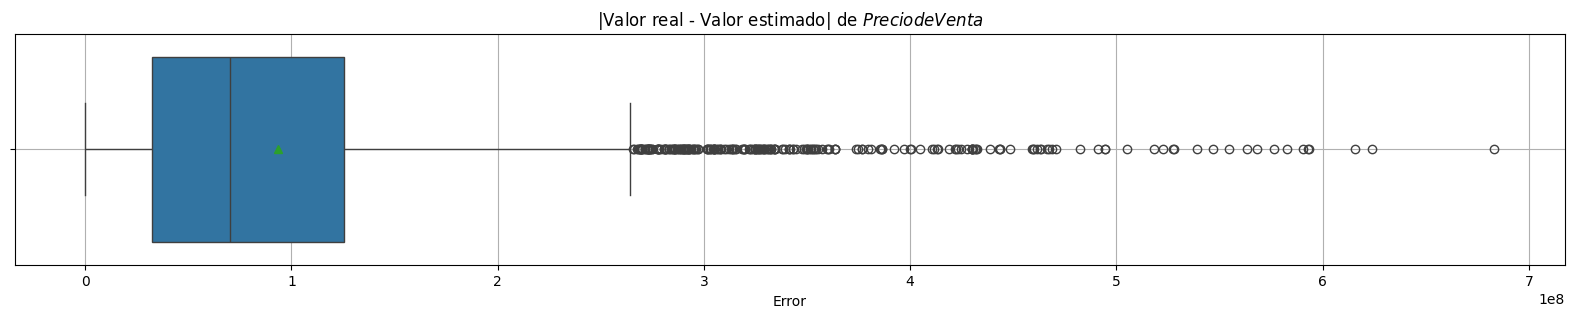

In [63]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Precio de Venta}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [64]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count        4523.00
mean     93419197.66
std      86912156.43
min         22746.41
25%      32544771.05
50%      70159394.60
75%     125537551.72
95%     270043334.22
99%     426998660.18
max     683341875.92
Name: precio_venta, dtype: float64

## **6. Entrenamiento de un segundo modelo aplicando normalización**

In [65]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [66]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [67]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

columns         coef
0                      area 198692422.72
1              habitaciones -35255429.07
2            administracion  84242777.09
3                   jacuzzi   1194581.45
4                  gimnasio  24437411.23
5                  ascensor   3919183.46
6                   piscina   9192533.35
7                   terraza    709884.52
8                vigilancia   3096324.45
9   distancia_estacion_tm_m  -7756649.21
10       distancia_parque_m   3530016.20
11          is_cerca_parque   5648628.03
12         conjunto_cerrado  -5172063.49
13                   sector  10924881.67
14               antiguedad -41176778.56
15                   estado  -3006306.56
16                localidad -31510321.21
17                 compañia  -3086925.24
18                   barrio  -3201150.50
19      estacion_tm_cercana   -685382.42
20           parque_cercano  -3599734.60

In [68]:
pipeline["model"].intercept_

579984764.9898597

In [69]:
y_train.mean(), y_test.mean()

(579984764.9898597, 582498772.5458766)

In [70]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 91480885.62922372
Test: 93419197.66429728

RMSE:
Train: 126926723.82794265
Test: 127589965.74474943


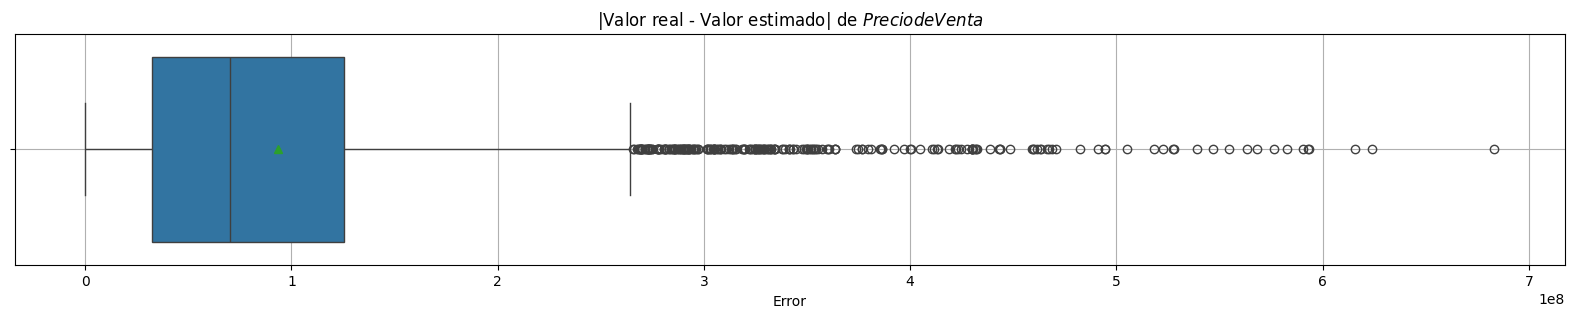

In [71]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - pipeline.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Precio de Venta}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [72]:
abs(y_test-pipeline.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count        4523.00
mean     93419197.66
std      86912156.43
min         22746.41
25%      32544771.05
50%      70159394.60
75%     125537551.72
95%     270043334.22
99%     426998660.18
max     683341875.92
Name: precio_venta, dtype: float64

<Axes: >

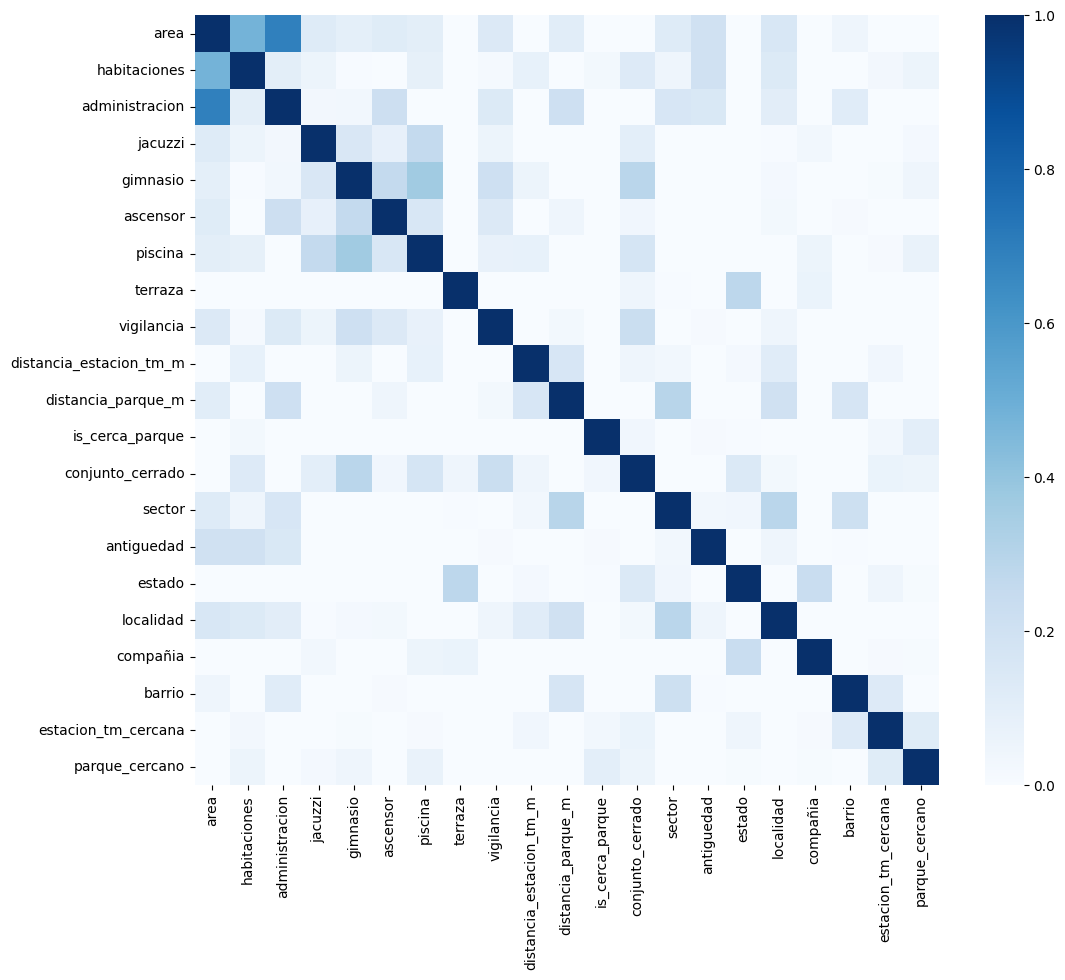

In [73]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [74]:
X_train.corr()

area  habitaciones  administracion  jacuzzi  \
area                     1.00          0.48            0.69     0.13   
habitaciones             0.48          1.00            0.10     0.06   
administracion           0.69          0.10            1.00     0.03   
jacuzzi                  0.13          0.06            0.03     1.00   
gimnasio                 0.10          0.00            0.03     0.16   
ascensor                 0.12         -0.06            0.22     0.08   
piscina                  0.10          0.09           -0.02     0.26   
terraza                 -0.03         -0.01           -0.03    -0.01   
vigilancia               0.14          0.02            0.14     0.06   
distancia_estacion_tm_m -0.00          0.08           -0.04     0.00   
distancia_parque_m       0.11         -0.04            0.21    -0.01   
is_cerca_parque         -0.07          0.03           -0.10    -0.01   
conjunto_cerrado        -0.01          0.13           -0.13     0.10   
sector                   0.13          0.05            0.16    -0.02   
antiguedad               0.20          0.20            0.15    -0.07   
estado                  -0.14         -0.00           -0.15    -0.03   
localidad                0.16          0.14            0.11     0.01   
compañia                -0.11         -0.01           -0.13     0.03   
barrio                   0.05         -0.06            0.11    -0.01   
estacion_tm_cercana     -0.11          0.03           -0.15    -0.01   
parque_cercano          -0.08          0.06           -0.13     0.02   

                         gimnasio  ascensor  piscina  terraza  vigilancia  \
area                         0.10      0.12     0.10    -0.03        0.14   
habitaciones                 0.00     -0.06     0.09    -0.01        0.02   
administracion               0.03      0.22    -0.02    -0.03        0.14   
jacuzzi                      0.16      0.08     0.26    -0.01        0.06   
gimnasio                     1.00      0.25     0.37    -0.01        0.21   
ascensor                     0.25      1.00     0.16    -0.06        0.14   
piscina                      0.37      0.16     1.00    -0.01        0.07   
terraza                     -0.01     -0.06    -0.01     1.00       -0.05   
vigilancia                   0.21      0.14     0.07    -0.05        1.00   
distancia_estacion_tm_m      0.06     -0.01     0.08    -0.01       -0.01   
distancia_parque_m          -0.02      0.04    -0.05     0.00        0.03   
is_cerca_parque             -0.02     -0.03    -0.00    -0.01       -0.01   
conjunto_cerrado             0.29      0.04     0.17     0.05        0.23   
sector                      -0.06     -0.00    -0.06     0.00       -0.04   
antiguedad                  -0.30     -0.17    -0.18    -0.02        0.02   
estado                      -0.07     -0.23    -0.05     0.28       -0.19   
localidad                    0.02      0.03    -0.02    -0.02        0.05   
compañia                    -0.11     -0.02     0.06     0.07       -0.26   
barrio                      -0.04      0.02    -0.06     0.00        0.00   
estacion_tm_cercana          0.01     -0.04     0.01     0.00       -0.03   
parque_cercano               0.04     -0.01     0.07    -0.01       -0.01   

                         distancia_estacion_tm_m  distancia_parque_m  \
area                                       -0.00                0.11   
habitaciones                                0.08               -0.04   
administracion                             -0.04                0.21   
jacuzzi                                     0.00               -0.01   
gimnasio                                    0.06               -0.02   
ascensor                                   -0.01                0.04   
piscina                                     0.08               -0.05   
terraza                                    -0.01                0.00   
vigilancia                                 -0.01                0.03   
distancia_estacion_tm_m  

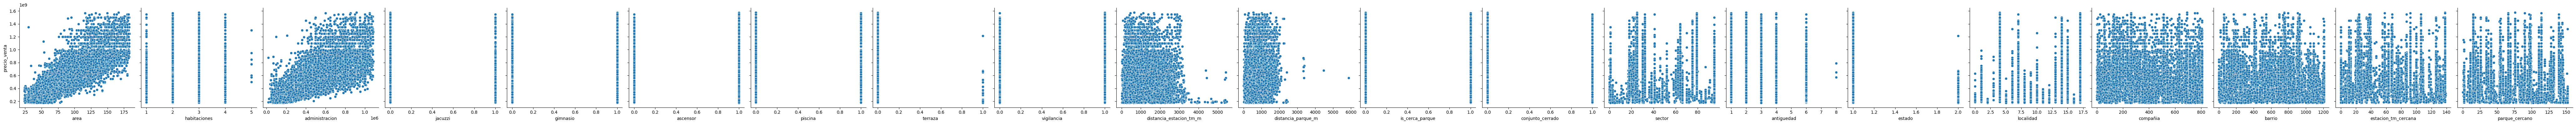

In [77]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="precio_venta", x_vars=features, kind="scatter")